<a href="https://colab.research.google.com/github/Norbert0924/Data_science/blob/main/Titainic_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


# 1. Data Upload

In [4]:
import pandas as pd

df= pd.read_csv("train.csv")
len(df)

891

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1 Explanation

'''
**Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton**
'''

# 2. Missing values

**Missing values**

In [6]:
df.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [7]:
df['Embarked'].isna().sum()

2

In [8]:
df.Parch.nunique()

7

Cabin, age and embarked columns have missing values.

# 3. EDA

**How many people survived?**

In [9]:
df['Survived'].mean()

0.3838383838383838

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df['Survived'].value_counts(normalize=True)
# 1 for survived, 0 for deceased

0    0.616162
1    0.383838
Name: Survived, dtype: float64

The survival rate was 38%.

**How are survival rates allocated across various genders?**





In [12]:
(df.groupby('Sex',dropna=False)
 .agg(number_of_passangers=('Survived','count'),
    survival_rate=('Survived','mean'))) # be careful with naming

,number_of_passangers,survival_rate
Sex,,
female,314,0.742038
male,577,0.188908


Male survival rate is reasonable lower than female.

**How many people boarded in different classes based on gender?**







In [ ]:
def sort_gender(value):
  if value==''


In [32]:
df['Sex_binary']=df['Sex'].replace('male',1).replace('female',0)


In [33]:
(df.groupby('Embarked',dropna=False)
 .agg(number_of_passangers=('Survived','count'),
    gender_rate=('Sex_binary','mean'))) # male=1 proportion of male passengers

,number_of_passangers,gender_rate
Embarked,,
C,168,0.565476
Q,77,0.532468
S,644,0.684783
NaN,2,0.000000


In [13]:
df.pivot_table(index='Embarked', columns='Sex', values='Survived', aggfunc='count')

# percentage must be here



Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


**What were the average ages of people who survived and did not survive, categorized by gender?**

In [14]:
df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc='mean')

Sex,female,male
Survived,,
0,25.046875,31.618056
1,28.847716,27.276022



sibsp	# of siblings / spouses aboard the Titanic


In [34]:
df.pivot_table(index='SibSp', columns='Sex', values='Age', aggfunc=['mean','count'],
               )
# we cant see the counts
# better to group here, ALL the time counts

mean             count     
Sex       female       male female male
SibSp                                  
0      28.631944  32.615443    144  327
1      30.738889  29.461505     90   93
2      16.541667  28.230769     12   13
3      16.500000   8.750000      8    4
4       8.333333   6.416667      6   12
5      16.000000   8.750000      1    4
8            NaN        NaN      0    0

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**What is the maximum fare paid by passengers categorized by their survival status, gender, passenger class, and the port where they embarked?**

In [35]:
df.pivot_table(index=['Survived'] ,columns=['Sex','Pclass','Embarked'], values='Fare', aggfunc='count')
# number of observations: the groups are tiny
# when groupping by more than 1 columns because the

Sex      female                                               male             \
Pclass        1               2                3                 1              
Embarked      C    Q     S    C    Q     S     C     Q     S     C    Q     S   
Survived                                                                        
0           1.0  NaN   2.0  NaN  NaN   6.0   8.0   9.0  55.0  25.0  1.0  51.0   
1          42.0  1.0  46.0  7.0  2.0  61.0  15.0  24.0  33.0  17.0  NaN  28.0   

Sex                                          
Pclass      2                3               
Embarked    C    Q     S     C     Q      S  
Survived                                     
0         8.0  1.0  82.0  33.0  36.0  231.0  
1         2.0  NaN  15.0  10.0   3.0   34.0

In [18]:
df.pivot_table(index='Survived', columns='Sex', values=['Fare', 'Age'], aggfunc={'Fare': 'max', 'Age': 'max'})


Age            Fare          
Sex      female  male    female      male
Survived                                 
0          57.0  74.0  151.5500  263.0000
1          63.0  80.0  512.3292  512.3292

**What insights can be derived from the average fare and average age across different embarkation points and passenger classes?**

In [36]:
df2 = df.pivot_table(index=['Embarked', 'Pclass'], values=['Fare', 'Age'], aggfunc={'Fare': 'mean', 'Age': 'mean','Embarked':'count'})
df2

Age  Embarked        Fare
Embarked Pclass                                 
C        1       38.027027        85  104.718529
         2       22.766667        17   25.358335
         3       20.741951        66   11.214083
Q        1       38.500000         2   90.000000
         2       43.500000         3   12.350000
         3       25.937500        72   11.183393
S        1       38.152037       127   70.364862
         2       30.386731       164   20.327439
         3       25.696552       353   14.644083

In [ ]:
# comments

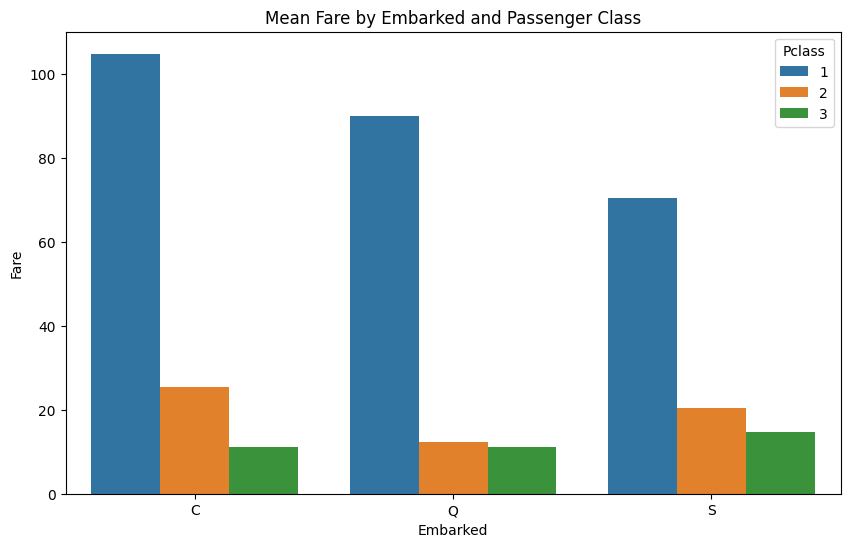

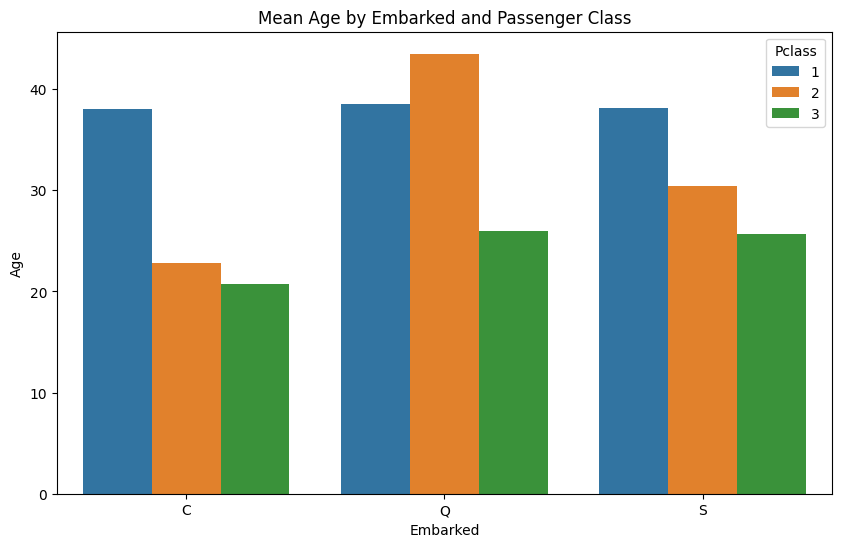

In [20]:

df2 = df2.reset_index()

# lot 1: Mean Fare by Embarked and Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=df2)
plt.title('Mean Fare by Embarked and Passenger Class')
plt.show()
# Plot 2: Mean Age by Embarked and Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Age', hue='Pclass', data=df2)
plt.title('Mean Age by Embarked and Passenger Class')
plt.show()

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**What is the average age and fare for passengers based on their Embarked port, Pclass (Passenger Class), and Survival status?**

In [22]:
df2 = df.pivot_table(index=['Pclass','Survived','Sex'], columns=['Embarked'], values=['Fare', 'Age'], aggfunc={'Fare': 'mean', 'Age': 'mean'})
# too many variables and use as rate

Age                              Fare  \
Embarked                        C          Q          S           C   
Pclass Survived Sex                                                   
1      0        female  50.000000        NaN  13.500000   28.712500   
                male    43.050000  44.000000  45.362500   80.847160   
       1        female  35.675676  33.000000  33.619048  117.710019   
                male    36.437500        NaN  36.121667  112.197806   
2      0        female        NaN        NaN  36.000000         NaN   
                male    29.500000  57.000000  33.414474   25.418225   
       1        female  19.142857  30.000000  29.091667   25.268457   
                male     1.000000        NaN  17.095000   25.433350   
3      0        female  20.700000  28.100000  23.688889   14.653125   
                male    27.555556  28.076923  27.168478    8.720842   
       1        female  11.045455  17.600000  22.548387   14.717220   
                male    18.488571  29.000000  22.933333   11.435840   

                                               
Embarked                        Q           S  
Pclass Survived Sex                            
1      0        female        NaN  151.550000  
                male    90.000000   53.563316  
       1        female  90.000000   96.743298  
                male          NaN   51.832739  
2      0        female        NaN   18.250000  
                male    12.350000   18.997561  
       1        female  12.350000   22.272951  
                male          NaN   20.516667  
3      0        female  10.904633   21.969018  
                male    11.841550   12.758689  
       1        female  10.084033   13.171842  
                male    12.916667   17.033450

**What is the average age of passengers based on their gender, survival status, and passenger class, categorized by the port where they embarked?**

In [23]:
df.pivot_table(index=['Sex','Survived','Pclass'], values=['Age','Fare'], aggfunc='mean')
#count
# unreadable table, analyse the insights

Age        Fare
Sex    Survived Pclass                       
female 0        1       25.666667  110.604167
                2       36.000000   18.250000
                3       23.818182   19.773093
       1        1       34.939024  105.978159
                2       28.080882   22.288989
                3       19.329787   12.464526
male   0        1       44.581967   62.894910
                2       33.369048   19.488965
                3       27.255814   12.204469
       1        1       36.248000   74.637320
                2       16.022000   21.095100
                3       22.274211   15.579696

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**What is the total sum of fares for each combination of passenger class (Pclass), survival status (Survived), and port of embarkation (Embarked)? Additionally, what is the overall total sum of fares across all categories, including a row and column for the grand total?**

In [25]:
# target variables analysis by all possible breakdowns, BUT stick with it main focus on target
# splitting one variable at the time

pd.pivot_table(df,
               index=['Pclass'], # only one on average, clear analysis, work as by iterations
               values=['Fare'],
               columns=['Survived', 'Embarked'], # same here 1 another way to use group by
               fill_value='',
               aggfunc=sum,
               margins=True,
               margins_name='Total_ticket_cost'
              )

Fare                                            \
Survived                   0                               1             
Embarked                   C         Q          S          C         Q   
Pclass                                                                   
1                  2049.8915      90.0  3034.8291  6851.1835      90.0   
2                   203.3458     12.35     1667.3   227.7459      24.7   
3                   405.0128  524.4375  4155.5532   335.1167  280.7668   
Total_ticket_cost  2658.2501  626.7875  8857.6823  7414.0461  395.4668   

                                                
Survived                     Total_ticket_cost  
Embarked                   S                    
Pclass                                          
1                  5901.5084        18017.4125  
2                     1666.4         3801.8417  
3                  1013.8081         6714.6951  
Total_ticket_cost  8581.7165        28533.9493

#

In [26]:
pivot_table_result=pd.pivot_table(df,
               index=['Pclass'],
               values=['Age'],
               columns=['Survived', 'Embarked'],
               fill_value='',
               aggfunc='mean',
               margins=True,
               margins_name='Average_age'

              )



In [27]:
pd.pivot_table(df,
               index=['Pclass','SibSp'],
               values=['Fare'],
               columns=['Survived', 'Embarked'],
               fill_value='',
               aggfunc=sum,
               margins=True,
               margins_name='Total_ticket_cost'
              )


Fare                                            \
Survived                         0                               1             
Embarked                         C         Q          S          C         Q   
Pclass            SibSp                                                        
1                 0      1641.5124            1498.8791  4098.7625             
                  1       408.3791              1272.95   2227.671      90.0   
                  2                     90.0                524.75             
                  3                               263.0                        
2                 0        42.9708     12.35      974.8    76.6584      24.7   
                  1        160.375                460.5   151.0875             
                  2                               232.0                        
                  3                                                            
3                 0       281.3543  314.0375   1845.703   171.8126  163.6168   
                  1       101.9793      93.9   758.0876   105.5292     70.65   
                  2        21.6792             167.5208    57.7749      46.5   
                  3                            276.6918                        
                  4                    116.5      386.2                        
                  5                               234.5                        
                  8                              486.85                        
Total_ticket_cost        2658.2501  626.7875  8857.6823  7414.0461  395.4668   

                                                      
Survived                           Total_ticket_cost  
Embarked                         S                    
Pclass            SibSp                               
1                 0      2906.4458        10145.5998  
                  1      2283.9334         6282.9335  
                  2       185.1292          799.8792  
                  3          526.0             789.0  
2                 0          732.4         1863.8792  
                  1         789.25         1561.2125  
                  2         123.75            355.75  
                  3           21.0              21.0  
3                 0       674.7498          3451.274  
                  1       252.5083         1382.6544  
                  2                         293.4749  
                  3          15.85          292.5418  
                  4           70.7             573.4  
                  5                            234.5  
                  8                           486.85  
Total_ticket_cost        8581.7165        28533.9493

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [55]:
# binning, agre
df['Age_bins']=pd.cut(df['Age'],[0,18,25,40,50, float('inf')])

In [58]:
# qcut: based on quantilies
df['Age_bins_2']=pd.qcut(df['Age'],5) # qcut equal groups in size why not
# all duplicates must be in one group,

In [59]:
(df.groupby('Age_bins_2',dropna=False)
 .agg(number_of_passangers=('Survived','count'),
    survival_rate=('Survived','mean')))

# max 5 rows for perceptions:


,number_of_passangers,survival_rate
Age_bins_2,,
"(0.419, 19.0]",164,0.481707
"(19.0, 25.0]",137,0.328467
"(25.0, 31.8]",127,0.393701
"(31.8, 41.0]",144,0.437500
"(41.0, 80.0]",142,0.373239


<Axes: xlabel='Age_bins'>

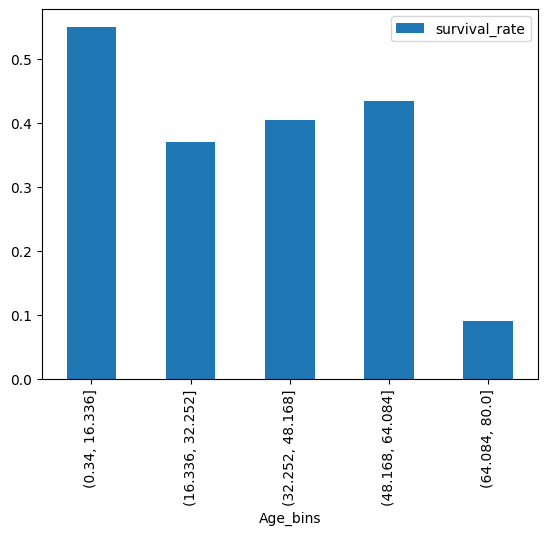

In [46]:
(df.groupby('Age_bins',dropna=False)
 .agg(survival_rate=('Survived','mean'))).plot(kind='bar') # each